In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data_df = pd.read_csv("BitcoinHeistData.csv")

***Loop*** is intended to count how many transaction 
i) split their coins; 
ii) move these coins in the network by using different paths and finally
iii) merge them in a single address. Coins at this final address can then be sold and converted to fiat currency. 

***Weight*** quantifies the merge behavior 
the transaction has more input addresses than output addresses 
where coins in multiple addresses are each passed through a succession of merging transactions and accumulated in a final address. Similar to weight, the count feature is designed to quantify the merging pattern. 


***Count***
Represents information on the number of transactions

***Weight***
 metric for measuring the "size" of a transaction.

***Length*** 
designed to quantify mixing rounds on Bitcoin, where transactions receive and distribute similar amounts of coins in multiple rounds with newly created addresses to hide the coin origin.

In [3]:
data_df.head()

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,100050000,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,100000000,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,200000000,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,71200000,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,200000000,princetonLocky


In [4]:
len(data_df['label'].unique())

29

In [5]:
data_df.shape

(1048575, 10)

In [6]:
data_df.describe()

,year,day,length,weight,count,looped,neighbors,income
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.012048e+03,1.735295e+02,2.631742e+01,5.406222e-01,1.582070e+02,3.608665e+01,2.324220e+00,9.026240e+09
std,1.005057e+00,1.001409e+02,4.272004e+01,2.990846e+00,6.024127e+02,2.884734e+02,1.862359e+01,2.555851e+11
min,2.011000e+03,1.000000e+00,0.000000e+00,3.610000e-94,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+07
25%,2.011000e+03,8.800000e+01,0.000000e+00,1.897321e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.086922e+08
50%,2.012000e+03,1.710000e+02,6.000000e+00,2.500000e-01,1.000000e+00,0.000000e+00,2.000000e+00,5.000000e+08
75%,2.013000e+03,2.560000e+02,2.800000e+01,5.606003e-01,8.000000e+00,0.000000e+00,2.000000e+00,2.518000e+09
max,2.018000e+03,3.650000e+02,1.440000e+02,4.982885e+02,1.346200e+04,1.169300e+04,3.776000e+03,4.996440e+13


In [7]:
data_df.corr()

,year,day,length,weight,count,looped,neighbors,income
year,1.000000,-0.140383,0.091772,0.031369,0.243637,0.088891,0.012219,-0.013735
day,-0.140383,1.000000,0.043422,-0.000952,-0.010989,-0.008651,0.001740,0.006916
length,0.091772,0.043422,1.000000,0.060180,0.662717,0.326880,0.080992,0.009642
weight,0.031369,-0.000952,0.060180,1.000000,0.101587,0.236314,0.763195,0.038858
count,0.243637,-0.010989,0.662717,0.101587,1.000000,0.478515,0.088426,-0.003557
looped,0.088891,-0.008651,0.326880,0.236314,0.478515,1.000000,0.192995,0.001996
neighbors,0.012219,0.001740,0.080992,0.763195,0.088426,0.192995,1.000000,0.084670
income,-0.013735,0.006916,0.009642,0.038858,-0.003557,0.001996,0.084670,1.000000


In [8]:
data_df.dtypes

address       object
year           int64
day            int64
length         int64
weight       float64
count          int64
looped         int64
neighbors      int64
income         int64
label         object
dtype: object

In [9]:
data_df['label'].unique()

array(['princetonCerber', 'princetonLocky', 'montrealCryptoLocker',
       'montrealCryptXXX', 'paduaCryptoWall', 'montrealWannaCry',
       'montrealDMALockerv3', 'montrealCryptoTorLocker2015',
       'montrealSamSam', 'montrealFlyper', 'montrealNoobCrypt',
       'montrealDMALocker', 'montrealGlobe', 'montrealEDA2',
       'paduaKeRanger', 'montrealVenusLocker', 'montrealXTPLocker',
       'paduaJigsaw', 'montrealGlobev3', 'montrealJigSaw',
       'montrealXLockerv5.0', 'montrealXLocker', 'montrealRazy',
       'montrealCryptConsole', 'montrealGlobeImposter', 'montrealSam',
       'montrealComradeCircle', 'montrealAPT', 'white'], dtype=object)

In [10]:
ransomware_list = ['princetonCerber','princetonLocky','montrealCryptoLocker',
                    'montrealCryptXXX','montrealWannaCry','montrealDMALockerv3', 'montrealCryptoTorLocker2015',
                    'montrealSamSam', 'montrealFlyper', 'montrealNoobCrypt','montrealDMALocker', 'montrealGlobe',
                    'montrealEDA2','montrealVenusLocker', 'montrealXTPLocker','montrealGlobev3', 'montrealJigSaw',
                    'montrealXLockerv5.0', 'montrealXLocker', 'montrealRazy','montrealCryptConsole', 'montrealGlobeImposter',
                    'montrealSam','montrealComradeCircle', 'montrealAPT',
                   'paduaCryptoWall','paduaKeRanger','paduaJigsaw']
data_df.replace(ransomware_list,'ransomeware',inplace = True)


In [11]:
#data_df.drop(['address'],1,inplace = True)
label_encoder = preprocessing.LabelEncoder()
data_df['address']=label_encoder.fit_transform(data_df['address'])
data_df.head()

,address,year,day,length,weight,count,looped,neighbors,income,label
0,10,2017,11,18,0.008333,1,0,2,100050000,ransomeware
1,42,2016,132,44,0.000244,1,0,1,100000000,ransomeware
2,57,2016,246,0,1.000000,1,0,2,200000000,ransomeware
3,78,2016,322,72,0.003906,1,0,2,71200000,ransomeware
4,108,2016,238,144,0.072848,456,0,1,200000000,ransomeware


In [12]:
data_df.replace('ransomeware',1,inplace = True)
data_df.replace('white',2,inplace = True)
data_df

,address,year,day,length,weight,count,looped,neighbors,income,label
0,10,2017,11,18,8.333333e-03,1,0,2,100050000,1
1,42,2016,132,44,2.441410e-04,1,0,1,100000000,1
2,57,2016,246,0,1.000000e+00,1,0,2,200000000,1
3,78,2016,322,72,3.906250e-03,1,0,2,71200000,1
4,108,2016,238,144,7.284841e-02,456,0,1,200000000,1
...,...,...,...,...,...,...,...,...,...,...
1048570,695006,2013,287,144,7.010000e-05,496,0,2,55000000,2
1048571,660412,2013,287,100,2.840000e-14,1,0,2,18049972389,2
1048572,348332,2013,287,4,2.500000e-01,1,0,2,156339306,2
1048573,616959,2013,287,2,2.000000e-01,1,0,2,5553650944,2


In [13]:
data_df.corr()

,address,year,day,length,weight,count,looped,neighbors,income,label
address,1.000000,0.002722,-0.002528,0.003331,0.007800,0.003525,0.004935,0.013549,0.001039,-0.003203
year,0.002722,1.000000,-0.140383,0.091772,0.031369,0.243637,0.088891,0.012219,-0.013735,-0.570677
day,-0.002528,-0.140383,1.000000,0.043422,-0.000952,-0.010989,-0.008651,0.001740,0.006916,-0.001843
length,0.003331,0.091772,0.043422,1.000000,0.060180,0.662717,0.326880,0.080992,0.009642,-0.072716
weight,0.007800,0.031369,-0.000952,0.060180,1.000000,0.101587,0.236314,0.763195,0.038858,-0.005887
count,0.003525,0.243637,-0.010989,0.662717,0.101587,1.000000,0.478515,0.088426,-0.003557,-0.148647
looped,0.004935,0.088891,-0.008651,0.326880,0.236314,0.478515,1.000000,0.192995,0.001996,-0.041483
neighbors,0.013549,0.012219,0.001740,0.080992,0.763195,0.088426,0.192995,1.000000,0.084670,0.002700
income,0.001039,-0.013735,0.006916,0.009642,0.038858,-0.003557,0.001996,0.084670,1.000000,0.006540
label,-0.003203,-0.570677,-0.001843,-0.072716,-0.005887,-0.148647,-0.041483,0.002700,0.006540,1.000000


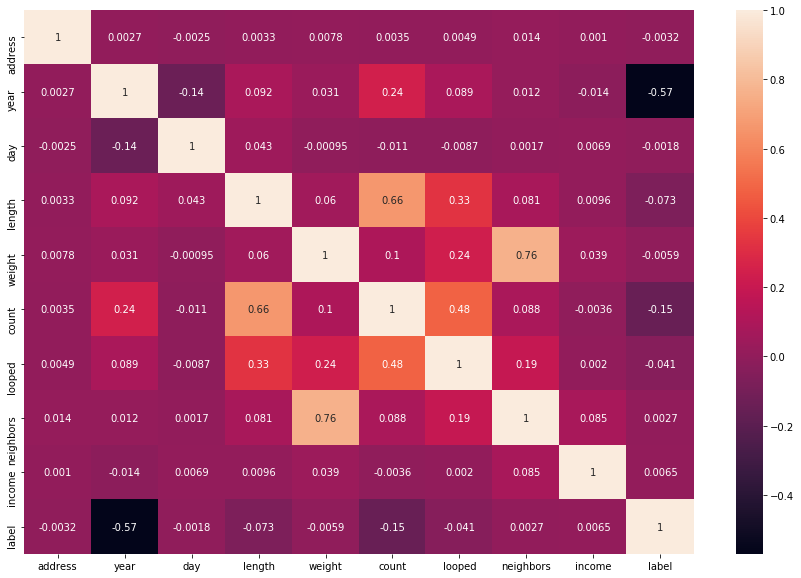

In [15]:
matrix = np.triu(data_df.corr())
plt.figure(figsize = (15,10))
sns.heatmap(data_df.corr(), annot=True)

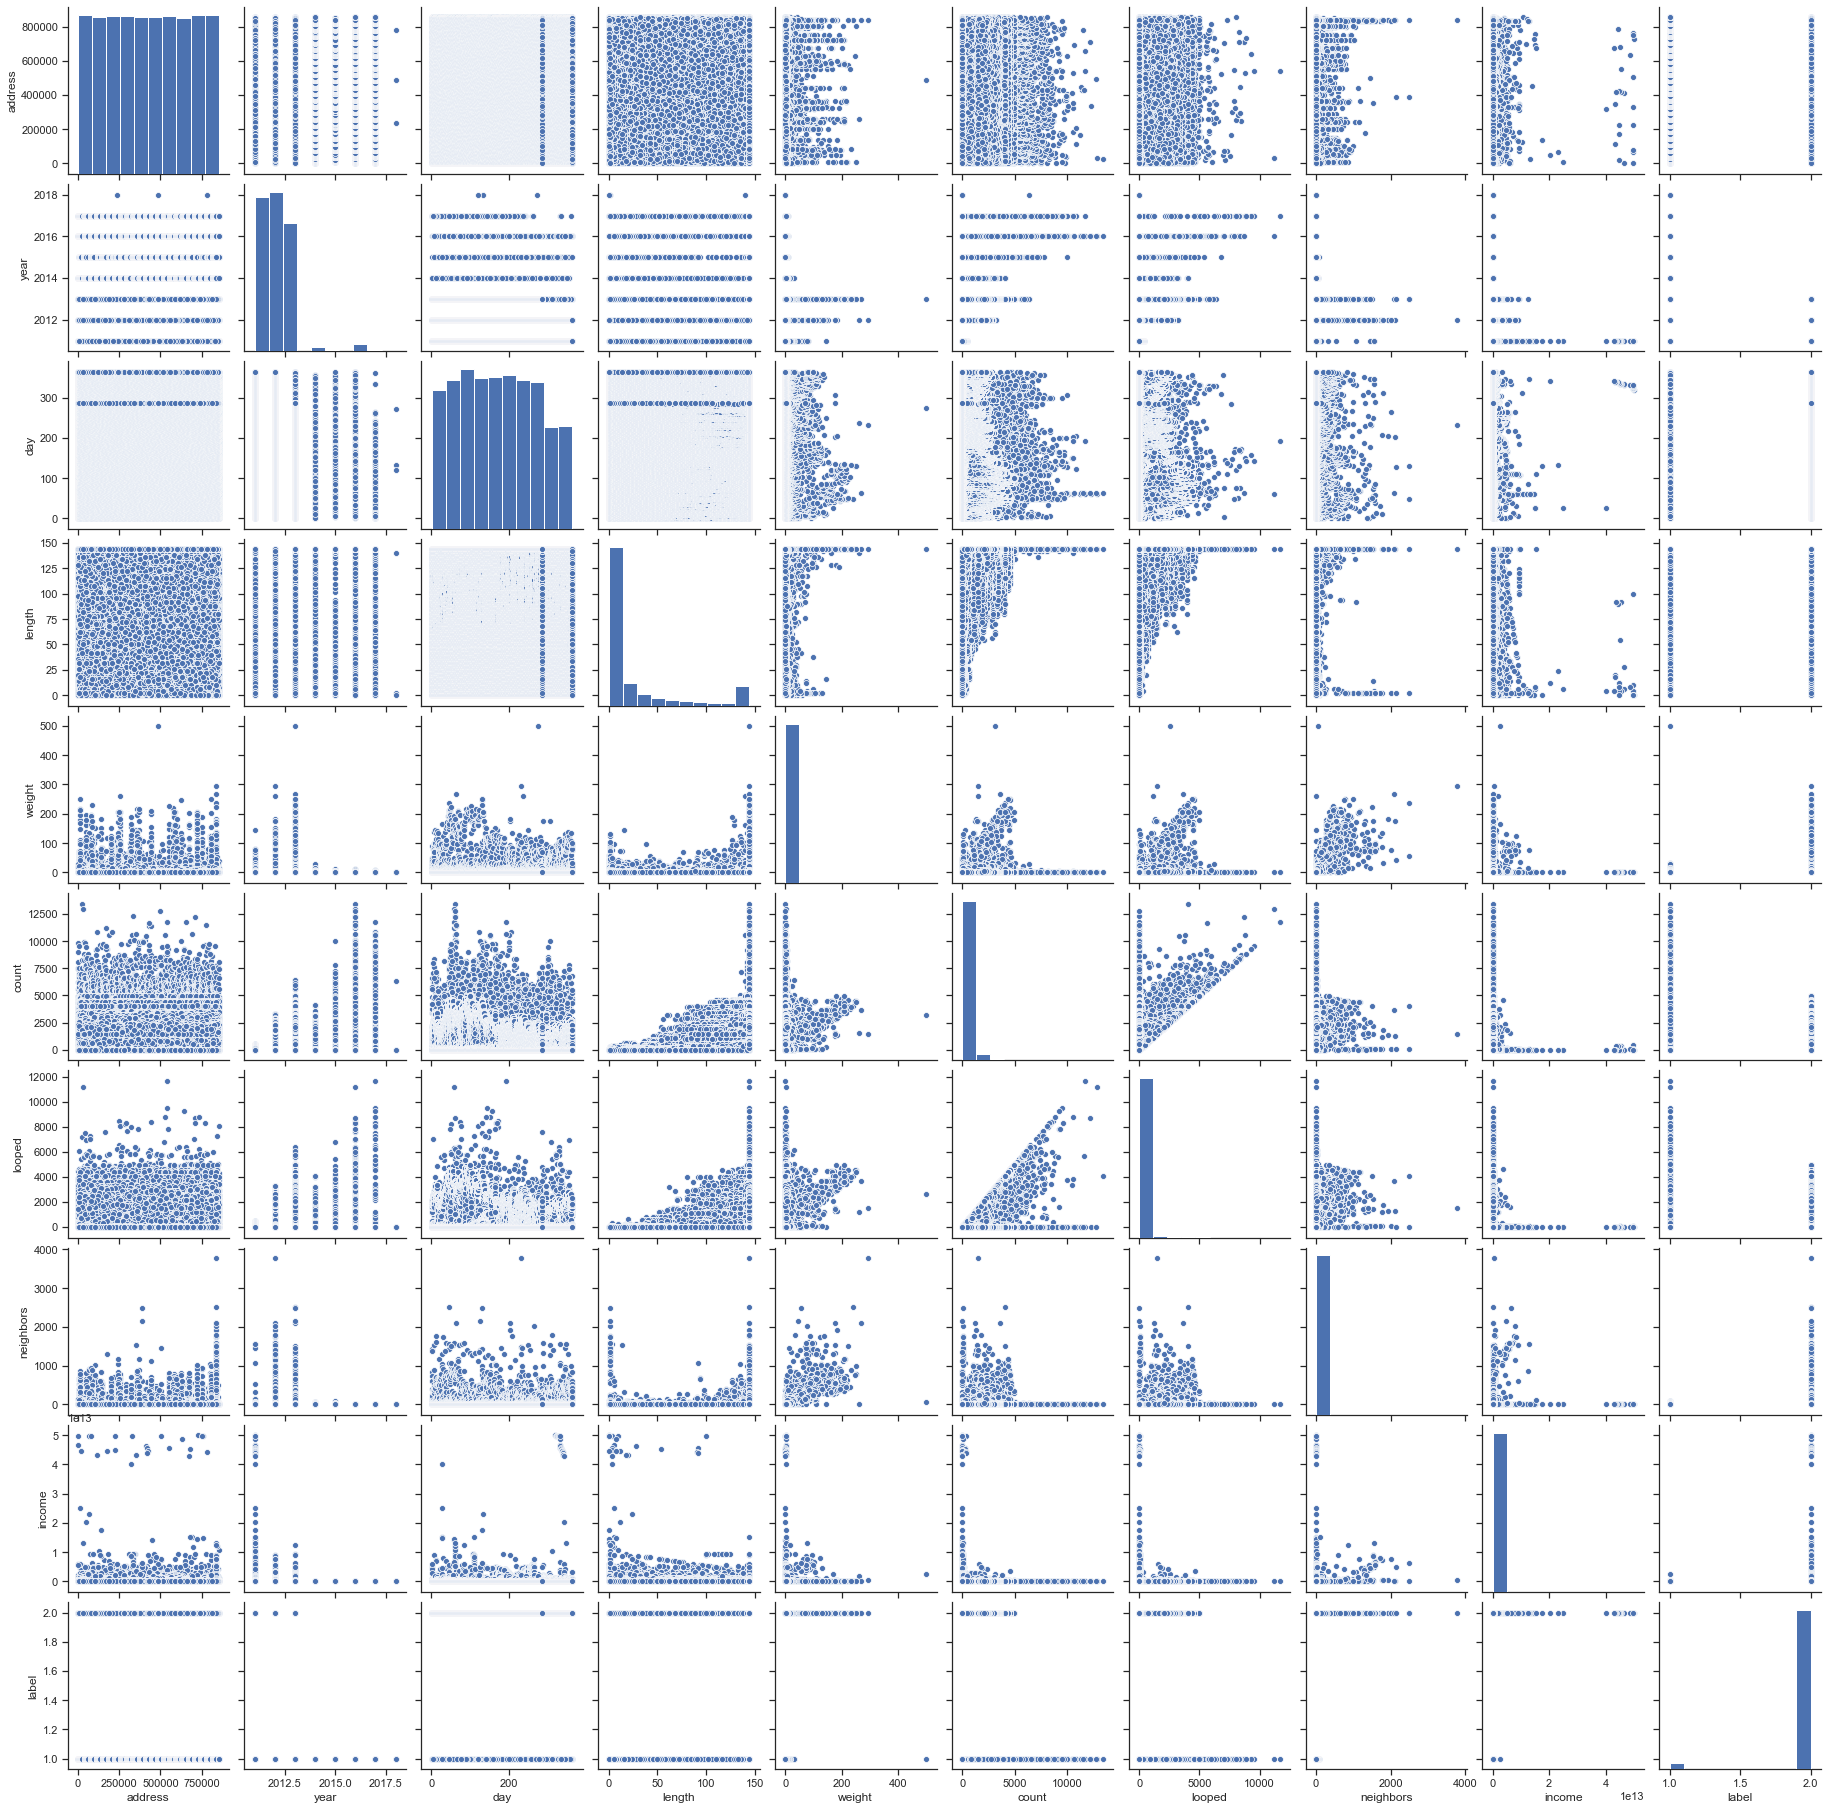

In [16]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data_df)

In [14]:
X = np.array(data_df.drop(['label'],1))
y = np.array(data_df['label'])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [16]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [22]:
y_pred = classifier.predict(X_test)

In [23]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.99      0.89      0.94      8173
           2       1.00      1.00      1.00    201542

    accuracy                           1.00    209715
   macro avg       0.99      0.95      0.97    209715
weighted avg       1.00      1.00      1.00    209715

[[  7284    889]
 [    65 201477]]
Accuracy: 0.9954509691724484


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
error_rate = []

# Might take some time
for i in range(1,21):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    print("When K=[",i,"] Accuracy is :",metrics.accuracy_score(y_test, pred_i))
print(error_rate)

When K=[ 1 ] Accuracy is : 0.9930000238418807
When K=[ 2 ] Accuracy is : 0.9900102520086784
When K=[ 3 ] Accuracy is : 0.9952125503659729
When K=[ 4 ] Accuracy is : 0.9949932050640155
When K=[ 5 ] Accuracy is : 0.9954509691724484
When K=[ 6 ] Accuracy is : 0.9954271272918008
When K=[ 7 ] Accuracy is : 0.9953746751543762
When K=[ 8 ] Accuracy is : 0.9953842119066352
When K=[ 9 ] Accuracy is : 0.995298381136304
When K=[ 10 ] Accuracy is : 0.9953269913930811
When K=[ 11 ] Accuracy is : 0.9952459289988794
When K=[ 12 ] Accuracy is : 0.9952554657511384
When K=[ 13 ] Accuracy is : 0.9951791717330664
When K=[ 14 ] Accuracy is : 0.9952077819898434
When K=[ 15 ] Accuracy is : 0.9950981093388647
When K=[ 16 ] Accuracy is : 0.9951553298524187
When K=[ 17 ] Accuracy is : 0.9950218153207925
When K=[ 18 ] Accuracy is : 0.995055193953699
When K=[ 19 ] Accuracy is : 0.9949788999356269
When K=[ 20 ] Accuracy is : 0.9950027418162745
[0.0069999761581193524, 0.009989747991321556, 0.004787449634027132, 0.0

Text(0, 0.5, 'Error Rate')

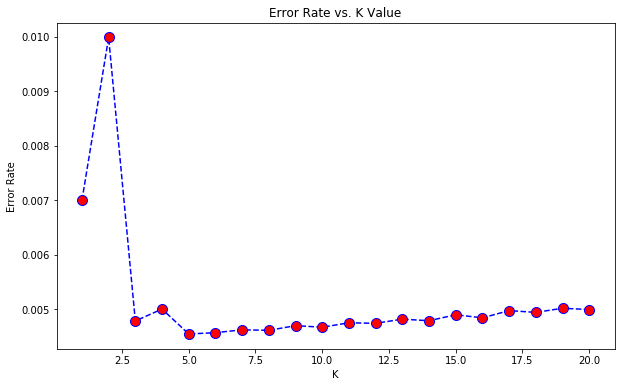

In [19]:
plt.figure(figsize=(10,6))
plt.plot(range(1,21),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')